This is a stock predictor, In this we are going to predict whether the stock will open at a higher price than yesterday or at a lower price using simple supervised machine learing algorithms and check which of the models give the best score and use it for the prediction of the stock price. It is more important to correctly predict the direction of stock price rather than its actual price.



In [83]:
# importing all the  necessary libraries required for the project

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE

In [84]:
df=pd.read_csv('/content/GOOGLE.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044


In [85]:

df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044


In [86]:

# this tells us that there are no null values in the data set
df.isnull().sum()


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

THIS IS THE OVERALL PLOT OF THE STOCK

<Axes: xlabel='Date'>

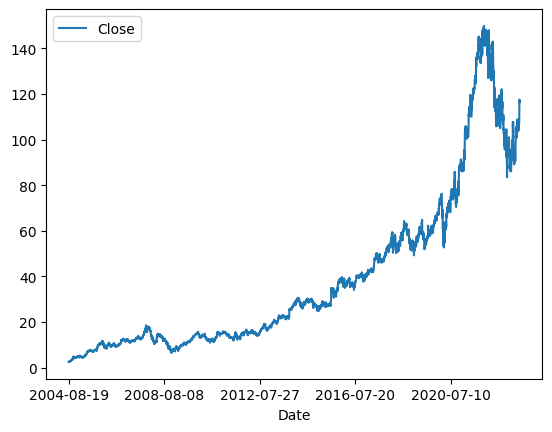

In [87]:
df.plot.line(y="Close",use_index=True)

THIS IS A LAST 5 YEARS ANALYSIS OF THE STOCK


<Axes: xlabel='Date'>

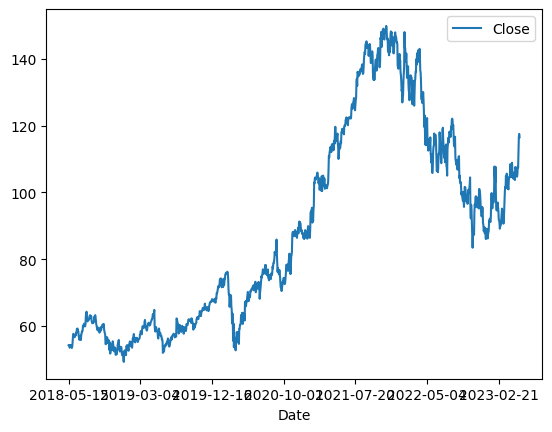

In [88]:
df1=df.loc["2018-05-15":].copy()
df1.plot.line(y="Close",use_index=True)

THIS IS A 3YEAR PLOT OF THE STOCK


<Axes: xlabel='Date'>

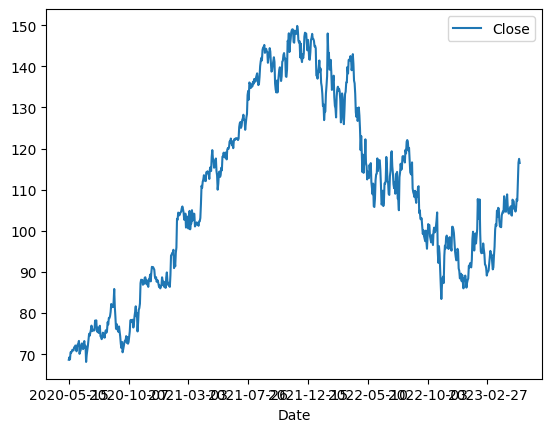

In [89]:
df2=df.loc["2020-05-15":].copy()
df2.plot.line(y="Close",use_index=True)

THIS IS A 1 YEAR PLOT OF THE STOCK


<Axes: xlabel='Date'>

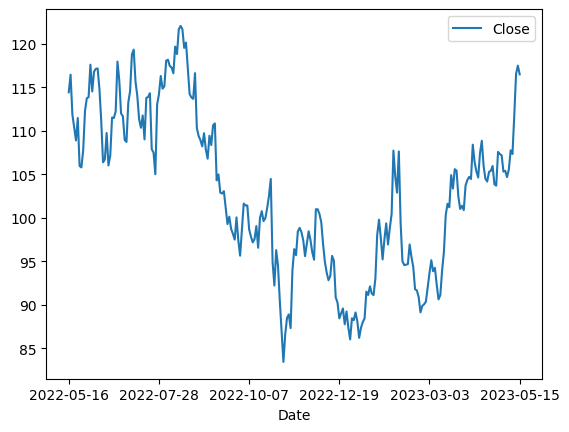

In [90]:
df3=df.loc["2022-05-15":].copy()
df3.plot.line(y="Close",use_index=True)

THIS IS A 6 MONTHS PLOT OF THE STOCK

<Axes: xlabel='Date'>

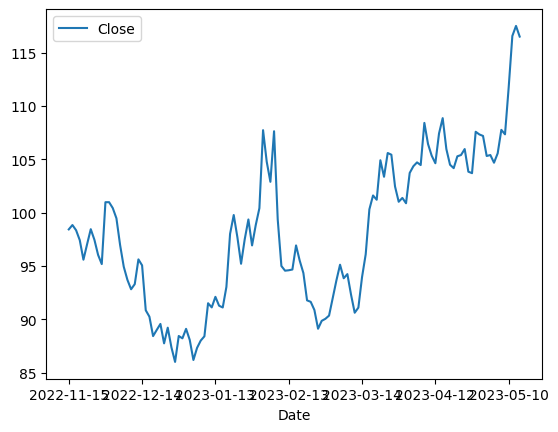

In [91]:
df4=df.loc["2022-11-15":].copy()
df4.plot.line(y="Close",use_index=True)

THIS IS A LAST MONTH PLOT OF A STOCK

<Axes: xlabel='Date'>

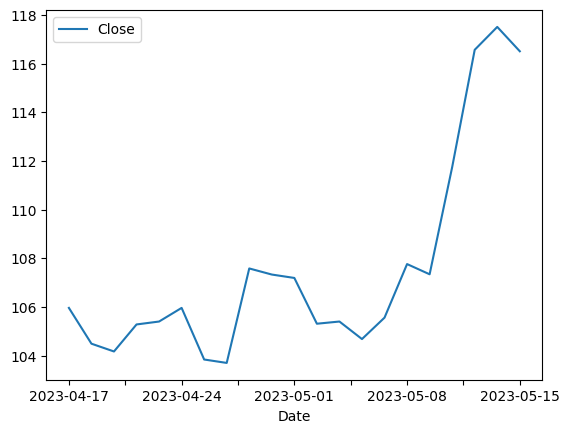

In [92]:
df5=df.loc["2023-04-15":].copy()
df5.plot.line(y="Close",use_index=True)

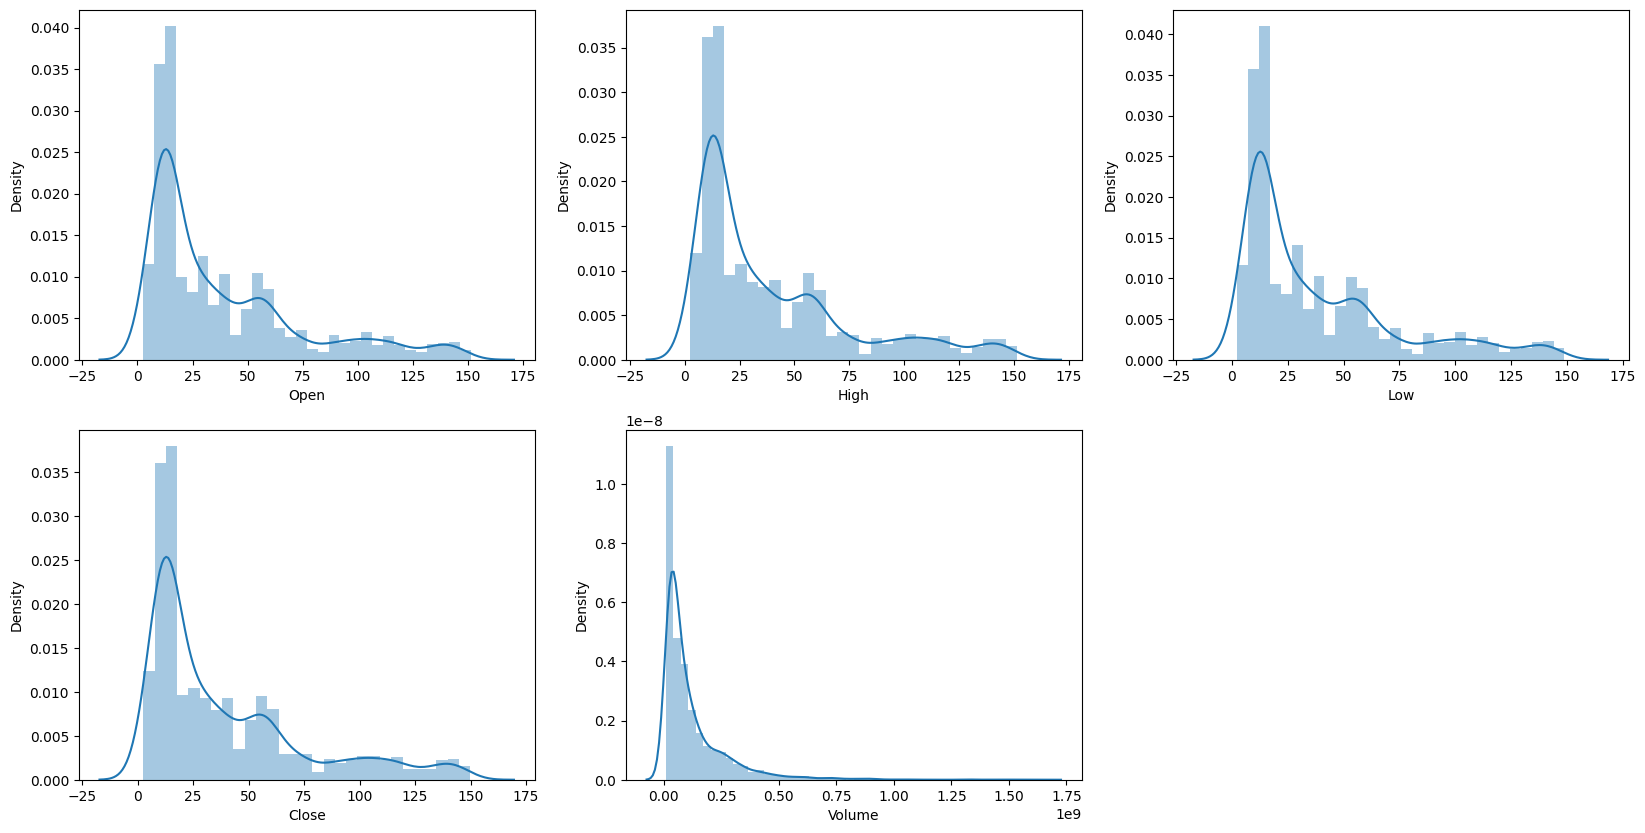

In [93]:
features=['Open','High','Low','Close','Volume']
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
plt.show()

In [109]:
df=pd.read_csv('/content/GOOGLE.csv')

In [110]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044


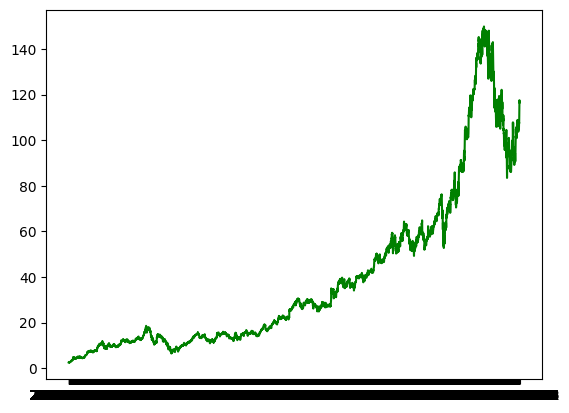

In [111]:
plt.plot(df['Date'],df['Close'],color="green")

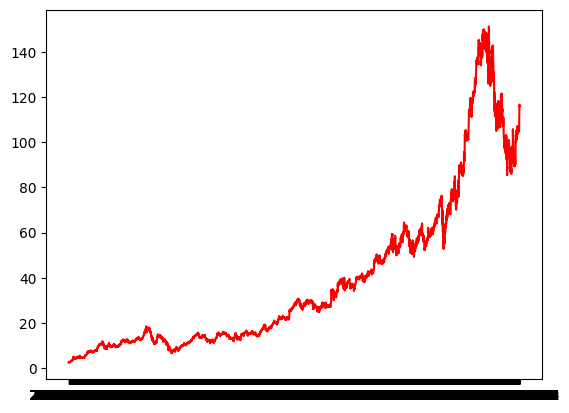

In [112]:
plt.plot(df['Date'],df['Open'],color="red")

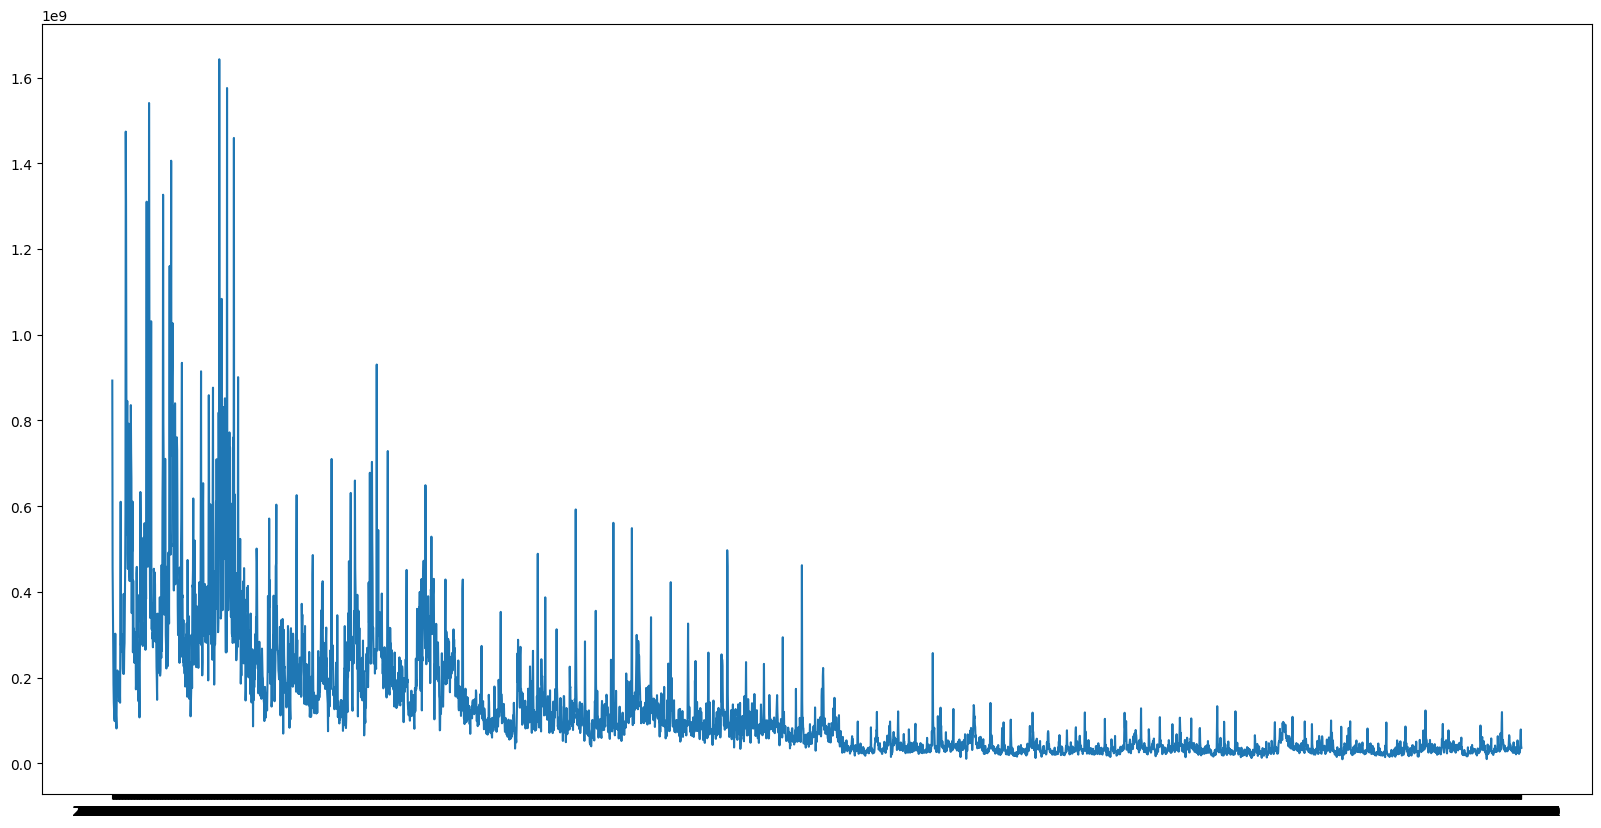

In [113]:
plt.figure(figsize=(20,10))
plt.plot(df['Date'],df['Volume'])
plt.show()

In [114]:
df.set_index('Date',inplace=True)

In [115]:
df['Tomorrow']=df['Close'].shift(-1)
df

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924,2.710460
2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856,2.737738
2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512,2.624374
2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748,2.652653
2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044,2.700450
...,...,...,...,...,...,...
2023-05-09,108.389999,110.150002,107.190002,107.349998,36360100,111.750000
2023-05-10,107.970001,112.940002,107.930000,111.750000,63153400,116.570000
2023-05-11,115.400002,117.919998,114.410004,116.570000,78900000,117.510002


In [116]:
df['Target']=(df['Tomorrow']>df['Close'])
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924,2.710460,True
2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856,2.737738,True
2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512,2.624374,False
2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748,2.652653,True
2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044,2.700450,True
...,...,...,...,...,...,...,...
2023-05-09,108.389999,110.150002,107.190002,107.349998,36360100,111.750000,True
2023-05-10,107.970001,112.940002,107.930000,111.750000,63153400,116.570000,True
2023-05-11,115.400002,117.919998,114.410004,116.570000,78900000,117.510002,True


In [117]:
df['Target']=df['Target'].astype(int)
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924,2.710460,1
2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856,2.737738,1
2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512,2.624374,0
2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748,2.652653,1
2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044,2.700450,1
...,...,...,...,...,...,...,...
2023-05-09,108.389999,110.150002,107.190002,107.349998,36360100,111.750000,1
2023-05-10,107.970001,112.940002,107.930000,111.750000,63153400,116.570000,1
2023-05-11,115.400002,117.919998,114.410004,116.570000,78900000,117.510002,1


In [99]:
df.drop(df.tail(1).index,inplace=True)
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924,2.710460,1
2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856,2.737738,1
2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512,2.624374,0
2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748,2.652653,1
2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044,2.700450,1
...,...,...,...,...,...,...,...
2023-05-08,105.180000,107.959999,105.160004,107.769997,26511400,107.349998,0
2023-05-09,108.389999,110.150002,107.190002,107.349998,36360100,111.750000,1
2023-05-10,107.970001,112.940002,107.930000,111.750000,63153400,116.570000,1


In [100]:
X=df.drop('Target',axis='columns')
y=df['Target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

Using randomforestclassifier

In [101]:
model=RandomForestClassifier(n_estimators=100,random_state=10)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)


0.7754237288135594

In [102]:
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,

using Decision tree

In [103]:
from sklearn import tree
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_preddtc=dtree.predict(X_test)
print(dtree.score(X_test,y_test))


0.8135593220338984


FOR THE FOLLOWING PREDICTION A DECISION TREE PERFORMS BETTER THAN A RANDOMFOREST CLASSIFIER


In [104]:
y_preddtc

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,